In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df1=pd.read_csv('observations.csv')
df2=pd.read_csv('species_info.csv')
print(df1)
print(df2)

                               scientific_name  \
0                           Vicia benghalensis   
1                               Neovison vison   
2                            Prunus subcordata   
3                         Abutilon theophrasti   
4                     Githopsis specularioides   
...                                        ...   
23291                     Croton monanthogynus   
23292                 Otospermophilus beecheyi   
23293  Heterotheca sessiliflora ssp. echioides   
23294                     Dicranella rufescens   
23295                           Cucurbita pepo   

                                 park_name  observations  
0      Great Smoky Mountains National Park            68  
1      Great Smoky Mountains National Park            77  
2                   Yosemite National Park           138  
3                      Bryce National Park            84  
4      Great Smoky Mountains National Park            85  
...                                    ...   

In [7]:
df=pd.merge(df1,df2,how='left')
print(df)

                               scientific_name  \
0                           Vicia benghalensis   
1                               Neovison vison   
2                            Prunus subcordata   
3                         Abutilon theophrasti   
4                     Githopsis specularioides   
...                                        ...   
25627                     Croton monanthogynus   
25628                 Otospermophilus beecheyi   
25629  Heterotheca sessiliflora ssp. echioides   
25630                     Dicranella rufescens   
25631                           Cucurbita pepo   

                                 park_name  observations           category  \
0      Great Smoky Mountains National Park            68     Vascular Plant   
1      Great Smoky Mountains National Park            77             Mammal   
2                   Yosemite National Park           138     Vascular Plant   
3                      Bryce National Park            84     Vascular Plant   
4   

In [13]:
print(df.scientific_name.nunique())
print(df.park_name.nunique())
print(df.scientific_name.isnull())
print(df.info())

5541
4
0        False
1        False
2        False
3        False
4        False
         ...  
25627    False
25628    False
25629    False
25630    False
25631    False
Name: scientific_name, Length: 25632, dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB
None


[Text(0, 0, 'Great Smoky Mountains National Park'),
 Text(1, 0, 'Yosemite National Park'),
 Text(2, 0, 'Bryce National Park'),
 Text(3, 0, 'Yellowstone National Park')]

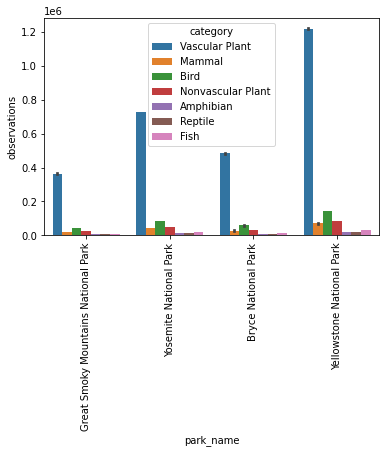

In [22]:
ax=plt.subplot()
sns.barplot(data=df,x='park_name',y='observations',estimator=np.sum,hue='category')
ax.set_xticks(range(df.park_name.nunique()))
ax.set_xticklabels(df.park_name.unique(),rotation=90)

In [23]:
#from the above the yellow national park have the highest observation,while the vascular plant have the highest observation in a given
#park

([<matplotlib.patches.Wedge at 0xa5b8d1d3a0>,
 [Text(0.7778174593052024, 0.7778174593052024, 'Great Smoky Mountains National Park'),
  Text(-0.7778174593052023, 0.7778174593052024, 'Yosemite National Park'),
  Text(-0.7778174593052025, -0.7778174593052023, 'Bryce National Park'),
  Text(0.7778174593052022, -0.7778174593052025, 'Yellowstone National Park')],
 [Text(0.4242640687119285, 0.4242640687119285, '25.000000%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25.000000%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.000000%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.000000%')])

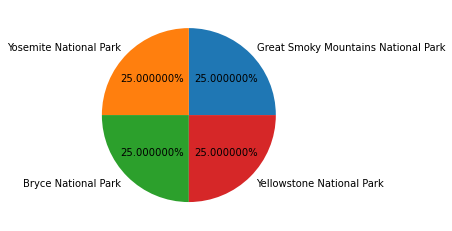

In [30]:
plt.clf()
plt.pie(df.park_name.value_counts(),labels=df.park_name.unique(),autopct='%0.1f%%')